#### This notebook is to find which feature are important

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline  

In [3]:
#ml-project-datasets
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/ml-project-datasets/data/processed_balanced_transaction.csv')
df.head()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionType,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,173544488,3,3060.76,711,460,1,7500.0,4439.24,173544488,711,0,0,3,3,1535,0,1,455.25,1,2014,4,12,2016,1,30,22,45,7,2019,9,1,2014,4,12
1,109517864,3,250.00,912,4842,1,250.0,0.00,109517864,912,0,0,7,3,1117,0,3,53.56,1,2014,11,7,2016,10,28,2,14,48,2024,3,1,2014,11,7
2,937106980,3,8272.83,312,92,1,15000.0,6727.17,937106980,312,0,0,3,3,26,0,2,319.40,1,2014,3,23,2016,10,9,12,0,17,2022,4,1,2016,9,16
3,942524230,3,5289.40,379,1683,1,7500.0,2210.60,942524230,379,0,0,5,3,180,1,1,12.76,1,2008,11,16,2016,1,8,4,17,52,2028,11,1,2008,11,16
4,899404344,3,3942.77,279,8069,1,5000.0,1057.23,899404344,279,0,0,1,3,1104,0,1,34.51,1,2012,3,22,2016,11,9,11,35,49,2019,5,1,2012,3,22


In [0]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42, n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature transactionAmount (0.461284)
2. feature posEntryMode (0.238895)
3. feature merchantName (0.052225)
4. feature merchantCategoryCode (0.042508)
5. feature accountNumber (0.024675)
6. feature customerId (0.022490)
7. feature transactionType (0.021297)
8. feature enteredCVV (0.018811)
9. feature cardCVV (0.017843)
10. feature cardPresent (0.016107)
11. feature currentBalance (0.012183)
12. feature accountOpenDate_day (0.011294)
13. feature cardLast4Digits (0.010590)
14. feature dateOfLastAddressChange_year (0.007816)
15. feature dateOfLastAddressChange_day (0.007122)
16. feature creditLimit (0.006090)
17. feature accountOpenDate_month (0.005907)
18. feature posConditionCode (0.005774)
19. feature accountOpenDate_year (0.003972)
20. feature availableMoney (0.003922)
21. feature dateOfLastAddressChange_month (0.003686)
22. feature transactionDateTime_month (0.002401)
23. feature transactionDateTime_second (0.000579)
24. feature transactionDateTime_day (0.000510)
2

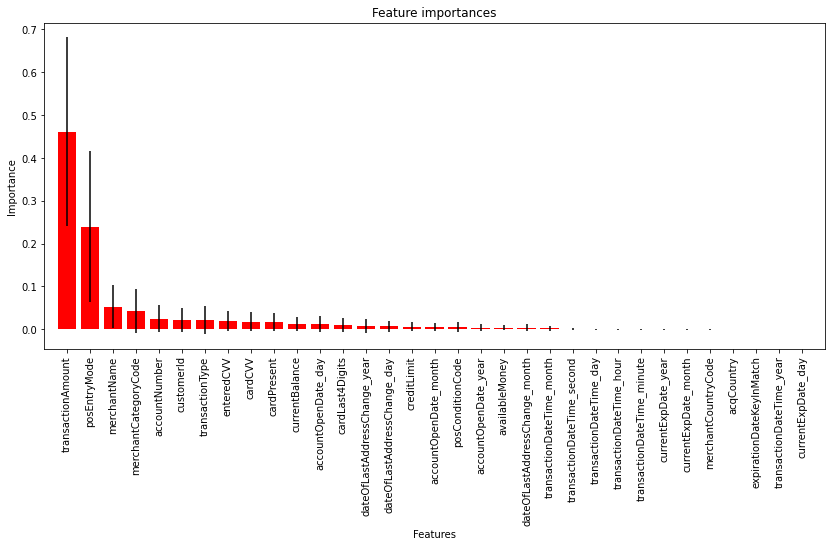

In [7]:
# Plot the feature importances of the forest
columns_sorted_by_importance = [X.columns[f] for f in indices]
plt.figure(figsize=(14,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), columns_sorted_by_importance, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xlim([-1, X.shape[1]])
plt.show()

#### The Accuracy Of Our Full Feature Classifier

In [8]:
# Apply The Full Featured Classifier To The Test Data
y_pred = forest.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
score = accuracy_score(y_test, y_pred)
print('Accuracy for full dataset: %.2f'%(score))

Accuracy for full dataset: 0.69


**Lets feed the model with 6 different sets of important features [5, 10, 15, 15, 20, 25, 30] and record accuracy, precision and reacal.**

In [0]:
feature_count = [5, 10, 15, 20, 25, 30]
accuracy_scores = []
precision_scores = []
recall_scores = []

columns_sorted_by_importance = [X.columns[f] for f in indices]
for c in feature_count:
    X_train_important =   X_train[columns_sorted_by_importance[:c]]
    X_test_important =   X_test[columns_sorted_by_importance[:c]]
    forest_important = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42, n_jobs=-1)
    forest_important.fit(X_train_important, y_train)
    y_pred = forest_important.predict(X_test_important)
    accuracy_sc = round(accuracy_score(y_test, y_pred), 2)
    precision_sc = round(precision_score(y_test, y_pred), 2)
    recall_sc = round(recall_score(y_test, y_pred), 2)
    accuracy_scores.append(accuracy_sc)
    precision_scores.append(precision_sc)
    recall_scores.append(recall_sc)


Let plot accuracy, precision and recall for 6 sets of feature.

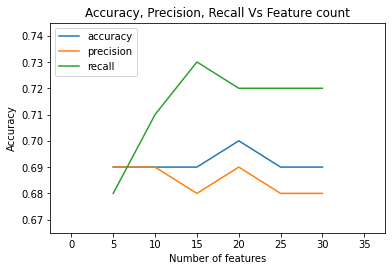

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(feature_count, accuracy_scores)
plt.plot(feature_count, precision_scores)
plt.plot(feature_count, recall_scores)
plt.margins(0.3)
plt.subplots_adjust(bottom=0.15)

plt.title('Accuracy, Precision, Recall Vs Feature count')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.legend(['accuracy', 'precision', 'recall'], loc='upper left')
plt.show()

So we see that  accuracy, precision and recall for each 6 sets are almost same. but the set with 20 most important features has highest accuracy. So we will take 20 most important features in feed our model.


In [18]:
print('accuracy_scores:'+str(accuracy_scores))
print('precision_scores:'+str(precision_scores))
print('recall_scores:'+str(recall_scores))

accuracy_scores:[0.69, 0.69, 0.69, 0.7, 0.69, 0.69]
precision_scores:[0.69, 0.69, 0.68, 0.69, 0.68, 0.68]
recall_scores:[0.68, 0.71, 0.73, 0.72, 0.72, 0.72]


### Important features 

So The followings are the high importance 20 features we will work on our rest of the project

- transactionAmount (0.461284)
- posEntryMode (0.238895)
- merchantName (0.052225)
- merchantCategoryCode (0.042508)
- accountNumber (0.024675)
- customerId (0.022490)
- transactionType (0.021297)
- enteredCVV (0.018811)
- cardCVV (0.017843)
- cardPresent (0.016107)
- currentBalance (0.012183)
- accountOpenDate_day (0.011294)
- cardLast4Digits (0.010590)
- dateOfLastAddressChange_year (0.007816)
- dateOfLastAddressChange_day (0.007122)
- creditLimit (0.006090)
- accountOpenDate_month (0.005907)
- posConditionCode (0.005774)
- accountOpenDate_year (0.003972)
- availableMoney (0.003922)

In [0]:
# let write this importance to csv. so that we can use later.

import csv
columns_importance = [(X.columns[f], importances[f]) for f in indices]
with open('/content/drive/My Drive/ml-project-datasets/data/feature_importance.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for row in columns_importance:
        writer.writerow(row)

In [21]:
columns_sorted_by_importance[:20]

['transactionAmount',
 'posEntryMode',
 'merchantName',
 'merchantCategoryCode',
 'accountNumber',
 'customerId',
 'transactionType',
 'enteredCVV',
 'cardCVV',
 'cardPresent',
 'currentBalance',
 'accountOpenDate_day',
 'cardLast4Digits',
 'dateOfLastAddressChange_year',
 'dateOfLastAddressChange_day',
 'creditLimit',
 'accountOpenDate_month',
 'posConditionCode',
 'accountOpenDate_year',
 'availableMoney']

Refernce code from 

- https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
- https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/